<a href="https://colab.research.google.com/github/Abhinavk910/Deep-Learning/blob/master/Predicting%20Image/Cats_and_Dogs/Logistic%20Regression%20with%20NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data

In [1]:
from google.colab import files
files.upload()


! pip install -q kaggle
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
! kaggle datasets download -d tongpython/cat-and-dog

 93% 201M/217M [00:03<00:00, 68.0MB/s]
100% 217M/217M [00:03<00:00, 68.3MB/s]


In [0]:
! unzip -q 'cat-and-dog.zip'
! unzip -q 'training_set.zip'
! unzip -q 'test_set.zip'

#Importing Library

In [4]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.image import imread
import os

from keras.preprocessing.image import img_to_array, load_img

from sklearn.model_selection import train_test_split

%matplotlib inline

Using TensorFlow backend.


# Data Visualization

In [6]:
file = '/content/training_set/'
catlen = len(os.listdir(file+'cats'))
doglen = len(os.listdir(file+'dogs'))
print(f'In training set \n Cat pics are {catlen} \n Dog pics are {doglen}')


In training set 
 Cat pics are 4001 
 Dog pics are 4006


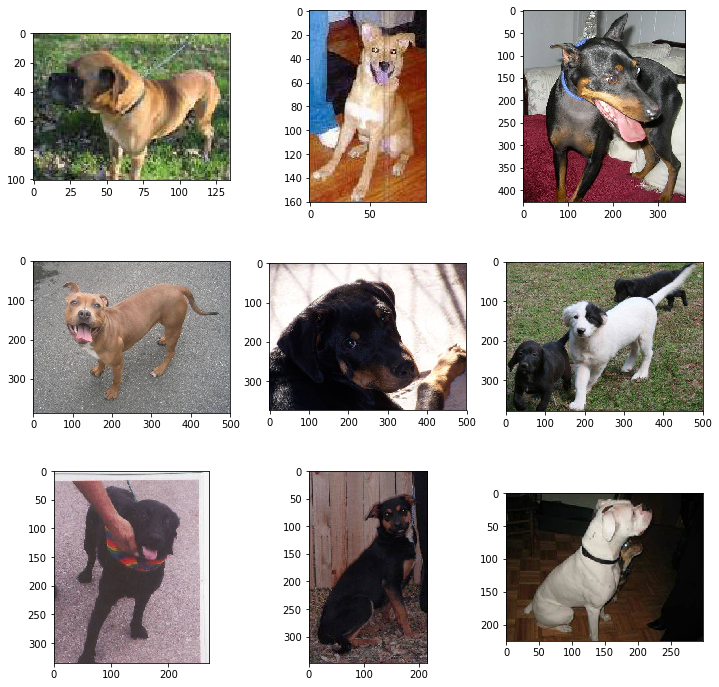

In [7]:
_, axes = plt.subplots(3,3, figsize = (12,12))
axes = axes.flatten()
for i,ax in zip(range(11,20), axes):
  ax.imshow(imread(file+'dogs/dog.'+str(i)+'.jpg'))
  
plt.show()

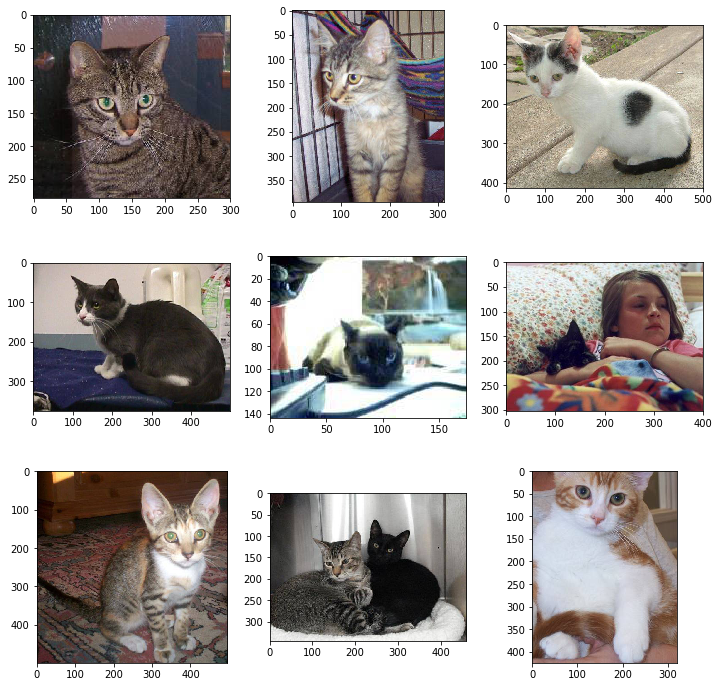

In [8]:
_, axes = plt.subplots(3,3, figsize = (12,12))
axes = axes.flatten()
for i, ax in zip(range(1, 10), axes):
  ax.imshow(imread(file + 'cats/cat.' + str(i) + '.jpg'))
  
plt.show()

# Converting Image size  to 200,**200**

In [0]:
labeldic = {'dogs' : 1,
            'cats' : 0}

photos, label = list(), list()
for animal in os.listdir(file):
  for pic in os.listdir(file+animal):
    try:
      pic = load_img(file + animal + '/' + pic, target_size = (200,200))
      photo = img_to_array(pic)
    
      photos.append(photo)
      label.append(labeldic[animal])
    except:
      continue
  
photos = np.asarray(photos)
label = np.asarray(label)    

In [10]:
print(f'Shape of photos is {photos.shape} \n Shape of label is {label.shape}')

Shape of photos is (8005, 200, 200, 3) 
 Shape of label is (8005,)


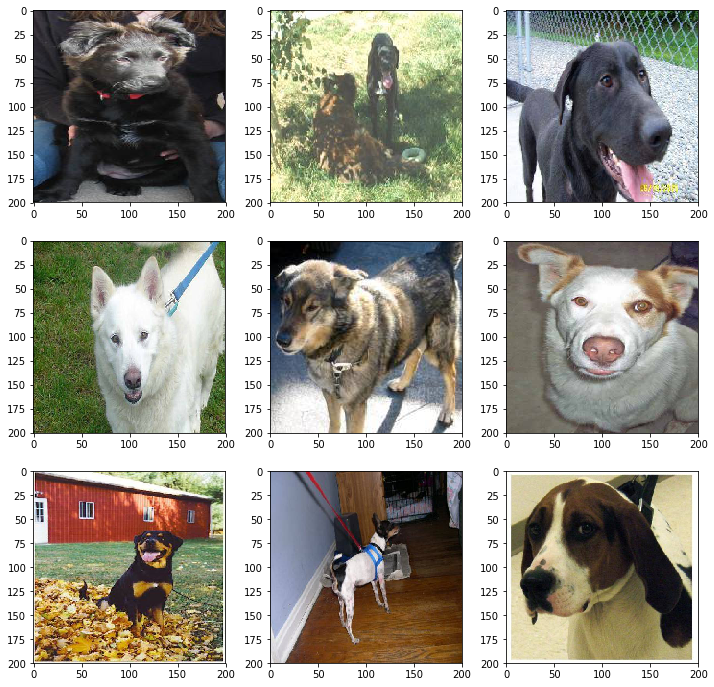

In [11]:
_, axes = plt.subplots(3,3, figsize = (12,12))
axes = axes.flatten()
for i, ax in zip(range(1, 10), axes):
  ax.imshow(photos[i].astype(np.uint8))
  
plt.show()

In [12]:
label = label.reshape(-1,1)
photos = photos.reshape(photos.shape[0], -1)
print(f'Shape of photos is {photos.shape} \n Shape of label is {label.shape}')

Shape of photos is (8005, 120000) 
 Shape of label is (8005, 1)


## Split data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(photos, label, test_size = 0.25, random_state = 42)

In [0]:
X_train = X_train.T / 255
y_train = y_train.T
X_test = X_test.T / 255
y_test = y_test.T

# Logistic ANN

In [15]:
print(f'shape of X_train is {X_train.shape}')

shape of X_train is (120000, 6003)


In [0]:
def initialize_vector(dim):
  w = np.zeros((dim, 1))
  b = 0
  return w,b

def sigmoid(z):
  return 1/(1 + np.exp(-z))

def forward_propogation(w, b, X):
  z = w.T.dot(X)+b
#   print(f'z is {z}')
  A = sigmoid(z)
  return A

def cost_funtion(A, Y):
  m = Y.shape[1]
  cost = np.sum((-1 / m) * (Y * np.log(A) + (1 - Y) * (np.log(1 - A))))
  return cost

def backward_propogation(A, X, Y):
  m = X.shape[1]
  dw = X.dot((A-Y).T) / m
  db = np.sum(A -Y) / m
  return dw, db

def update_vector(w, b, dw, db, learning_rate):
  w = w - learning_rate * dw
  b = b - learning_rate * db
  return w, b

# ------------------------------------------------------------------------------

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False, SGD = False):
  
  costs = []
  
  for i in range(num_iterations):
    A = forward_propogation(w, b, X)
    cost = cost_funtion(A, Y)
    dw, db = backward_propogation(A, X, Y)
    w, b = update_vector(w, b, dw, db, learning_rate)
    
    if i % 10 == 0:
      costs.append(cost)
      
    if SGD:
      if print_cost and i % 1 == 0:
        print(f'Cost after iteration {i+1} : {cost}', end = " $||$ ")
    else:
      if print_cost and (i+1) % 3 == 0:
        print(f'Cost after iteration {i} : {cost}', end = "\n")
  params = {"w": w,
            "b": b}
  grads = {"dw": dw,
           "db": db}
  return params, grads, costs

# ------------------------------------------------------------------------------

def predict(w, b, X):
  m = X.shape[1]
  y_pred = np.zeros((1,m))
  A = sigmoid(w.T.dot(X) + b)
  
  for i in range(A.shape[1]):
    y_pred[0, i] = 1 if A[0, i] > 0.5 else 0
  
  return y_pred

# ------------------------------------------------------------------------------

def model(X_train, Y_train, X_test, Y_test,w = 0, b = 0, num_iterations = 2, learning_rate = 0.0005,
          initialize_vectors = True, print_cost = False, SGD = True):
  
  if initialize_vectors:
    w, b = initialize_vector(X_train.shape[0])
  
  parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost, SGD)
  
  w = parameters["w"]
  b = parameters["b"]
  
  Y_prediction_test = predict(w, b, X_test)
  Y_prediction_train = predict(w, b, X_train)
  
  if print_cost:

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100), end = " $||$ ")
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
  
  d = {"costs": costs,
     "Y_prediction_test": Y_prediction_test, 
     "Y_prediction_train" : Y_prediction_train,
     "w" : w, 
     "b" : b,
     "learning_rate" : learning_rate,
     "num_iterations": num_iterations}

  return d

In [17]:
lann = model(X_train, y_train, X_test, y_test, num_iterations = 10, learning_rate = 1e-3, print_cost = True, SGD = False)

Cost after iteration 2 : 0.689904257308456
Cost after iteration 5 : 2.4461439724264666
Cost after iteration 8 : 3.5174983709392422
train accuracy: 50.27486256871565 % $||$ test accuracy: 49.05094905094906 %


# SGD

In [0]:
def batch_generator(X, Y, batch_size):
  indices = np.arange(len(X))
  batch=[]
  np.random.shuffle(indices)
  for i in indices:
    batch.append(i)
    if len(batch) == batch_size:
      yield X[batch], Y[batch]
      batch=[]

In [0]:
def SGD(w, b, epoch, batch_size, X_train, y_train, X_test, y_test, learning_rate, initialize_vector = False):

  cost = {}

  for e in range(epoch):
    print(f'epoch - {e+1}')


    train_generator = batch_generator(X_train.T, y_train.T, batch_size = batch_size)

    for i, (X_train_batch, y_train_batch) in enumerate(train_generator) :
      print('\r',f'batch no. {i+1}/{X_train.shape[1]//batch_size}', end = " ")
      lann = model(X_train_batch.T, y_train_batch.T, X_test, y_test,w, b, num_iterations = 1,
                   initialize_vectors = False, learning_rate = learning_rate, print_cost = False, SGD = True)
      w, b = lann['w'], lann['b']
      cost[str(e)+'-'+str(i)] = lann['costs']

    d = model(X_train, y_train, X_test, y_test, w, b, num_iterations = 1, learning_rate = learning_rate,
              initialize_vectors = initialize_vector, print_cost = True, SGD = True)
  return w, b, cost

In [22]:
w, b = initialize_vector(X_train.shape[0])
epoch = 9
batch_size = 256
w, b, cost = SGD(w, b, epoch, batch_size, X_train, y_train, X_test, y_test, learning_rate = 1e-3)

epoch - 1
 batch no. 23/23 Cost after iteration 1 : 2.592337214553646 $||$ train accuracy: 50.27486256871565 % $||$ test accuracy: 49.05094905094906 %
epoch - 2
 batch no. 23/23 Cost after iteration 1 : 2.0617210024331514 $||$ train accuracy: 49.72513743128436 % $||$ test accuracy: 50.94905094905095 %
epoch - 3
 batch no. 23/23 Cost after iteration 1 : 3.091176143519701 $||$ train accuracy: 50.27486256871565 % $||$ test accuracy: 49.05094905094906 %
epoch - 4
 batch no. 23/23 Cost after iteration 1 : 2.597494677647186 $||$ train accuracy: 49.84174579376979 % $||$ test accuracy: 51.548451548451546 %
epoch - 5
 batch no. 23/23 Cost after iteration 1 : 3.1581149629765015 $||$ train accuracy: 50.05830418124271 % $||$ test accuracy: 48.75124875124875 %
epoch - 6
 batch no. 23/23 Cost after iteration 1 : 2.7464499375516778 $||$ train accuracy: 50.22488755622189 % $||$ test accuracy: 51.84815184815184 %
epoch - 7
 batch no. 23/23 Cost after iteration 1 : 3.391585317926138 $||$ train accuracy:

Text(0, 0.5, 'Loss')

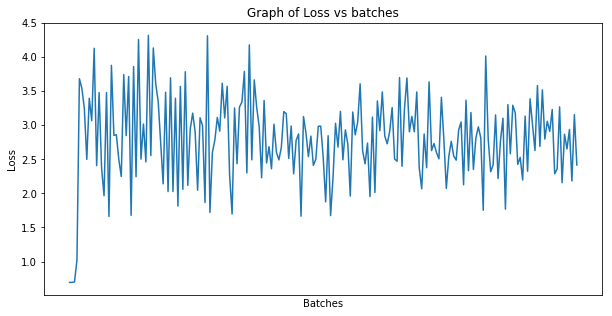

In [23]:
plt.figure(figsize=(10,5))
plt.plot(cost.keys(), cost.values())
plt.title('Graph of Loss vs batches')
plt.xlabel('Batches')
plt.xticks([])
plt.ylabel('Loss')

In [0]:
y_pred = predict(w, b, X_test)

In [37]:
np.unique((y_test.T+y_pred.T), return_index = True)

(array([0., 1., 2.]), array([5, 0, 3]))

y = dogs, you predicted that it is a "dogs" picture.


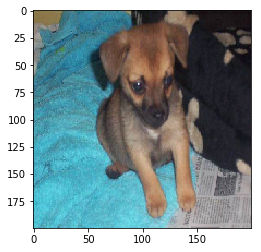

In [49]:
index = 30
plt.imshow(X_test[:,index].reshape((200, 200, 3)))
print ("y = " + str([animal for animal, value in labeldic.items() if value == int(y_test[0,index])][0]) + ", you predicted that it is a \"" + str([animal for animal, value in labeldic.items() if value == int(y_pred[0,index])][0]) +  "\" picture.")